# Flight Tests 28 April 2019

In [1]:
from mgl_efis_plotter import *
import pandas as pd

In [2]:
flights = create_flights('IEFISBB.DAT', Config)
for i in range(0, len(flights)):
    print(i, flights[i])

0 Flight at 2019-04-21 12:41:41 to 2019-04-21 12:41:41,   23,954 messages
1 Flight at 2019-04-28 16:14:33 to 2019-04-28 16:20:43,   1,589 messages
2 Flight at 2019-04-28 16:31:14 to 2019-04-28 17:15:30,   9,941 messages


## Takeoff and Landing Performance

### Weather

`KSET 281954Z AUTO 12011G20KT 9SM FEW110 13/04 A3012 RMK AO2 SLP201 T01280044`

Density altitude: approximately 500 ft.

### Airplane Weight

Approximate weight: 1700 lbs.

### Performance

* short field takeoff, 2 notches flaps: **723 ft**
* short field landing, runway threshold to stop: **792 ft**
   * ground roll: **387 ft**
* normal landing (very gentle braking): **1011 ft**

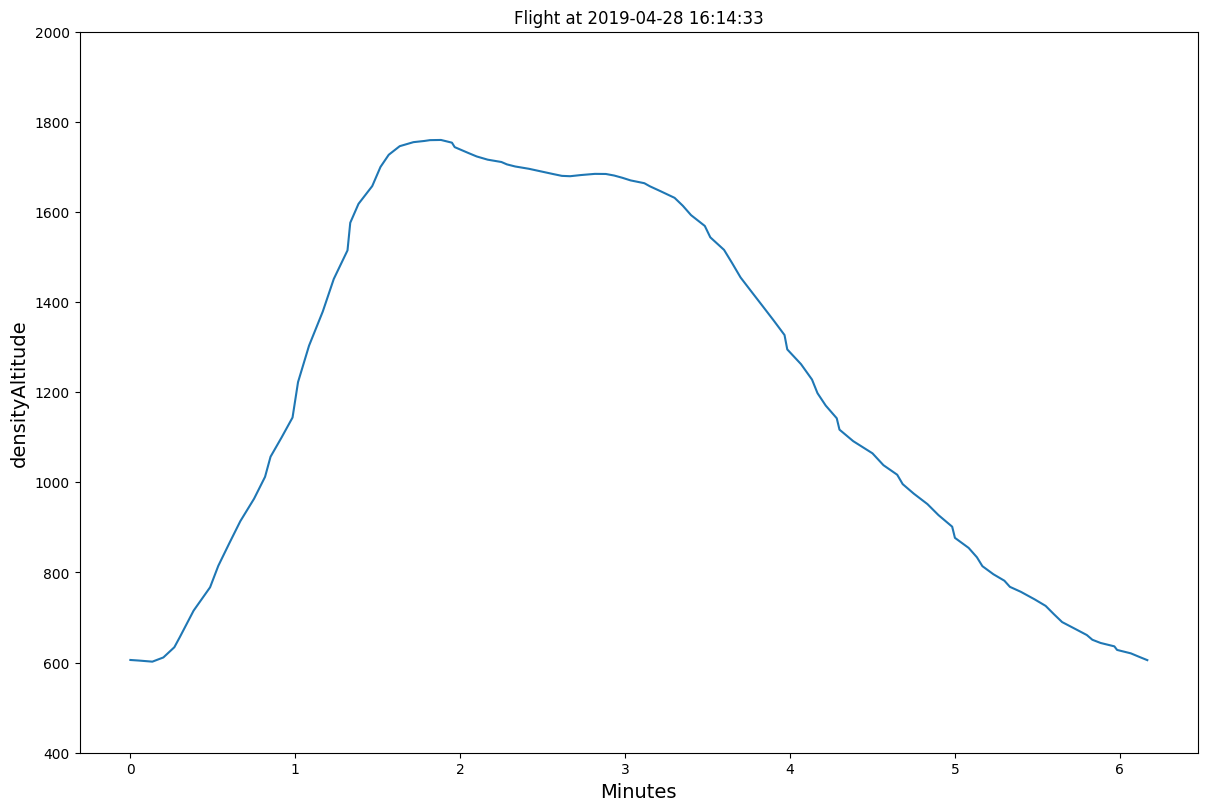

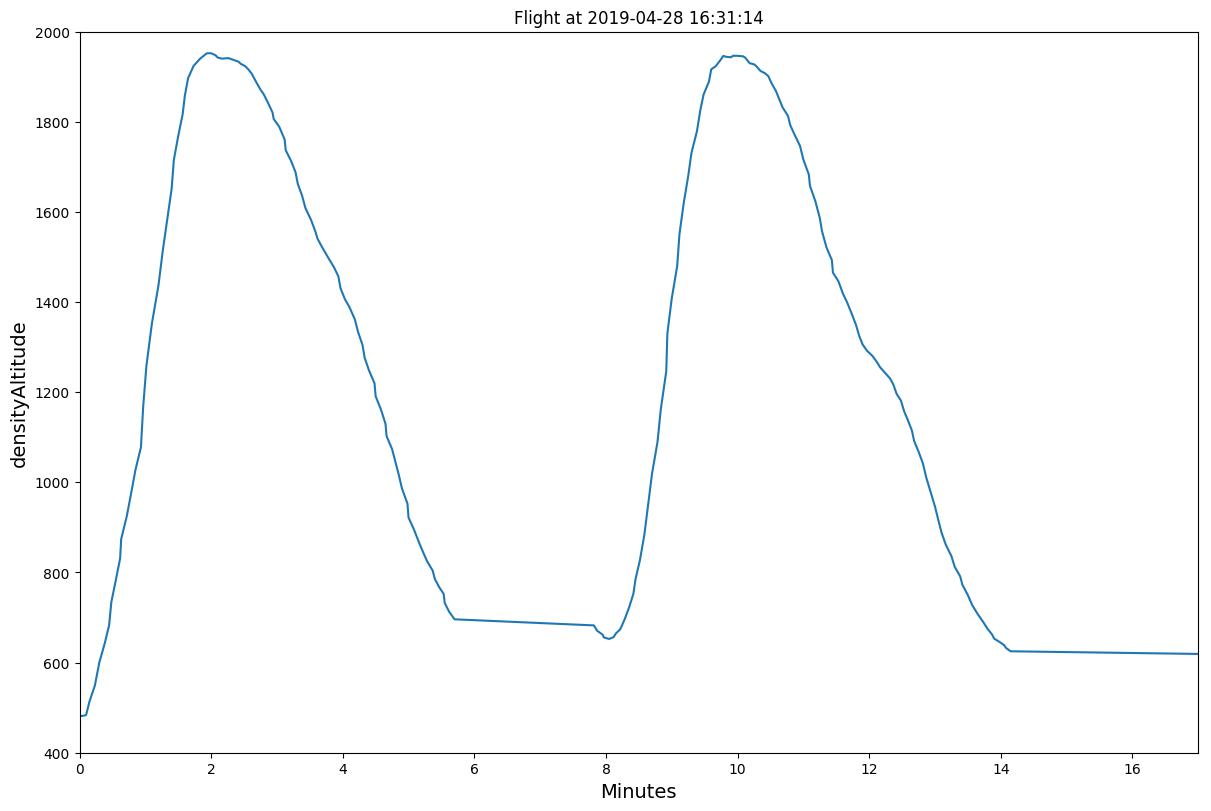

In [13]:
p1 = Plot(flights[1])
p2 = Plot(flights[2])
p1.plot('densityAltitude', ylim=(400, 2000)).show()
p2.plot('densityAltitude', xlim=(0, 17), ylim=(400, 2000)).show()

## Fuel Flow

In [4]:
f = flights[2]
p = Plot(f)

ff_data = f.list_data('fuelFlow')
ff = pd.DataFrame(ff_data, index=ff_data['minutes'], columns=['fuelFlow'])

## Fuel Flow Calculations

In [5]:
print('fuel flow @ takeoff power', float(ff.max()), 'gph')
print('fuel flow @ cruise climb, 75%, full rich', float(ff.loc[19:20].mean()), 'gph')
print('fuel flow @ 75%', float(ff.loc[22.5:24].mean()), 'gph')
print('fuel flow @ 65%', float(ff.loc[29.5:30.5].mean()), 'gph')
print('fuel flow @ 55%', float(ff.loc[31.5:33].mean()), 'gph')

fuel flow @ takeoff power 15.165125495376484 gph
fuel flow @ cruise climb, 75%, full rich 11.812040007548593 gph
fuel flow @ 75% 10.867734478203436 gph
fuel flow @ 65% 7.9953764861294605 gph
fuel flow @ 55% 6.976147154856561 gph


## Flight 2 - Fuel Flow

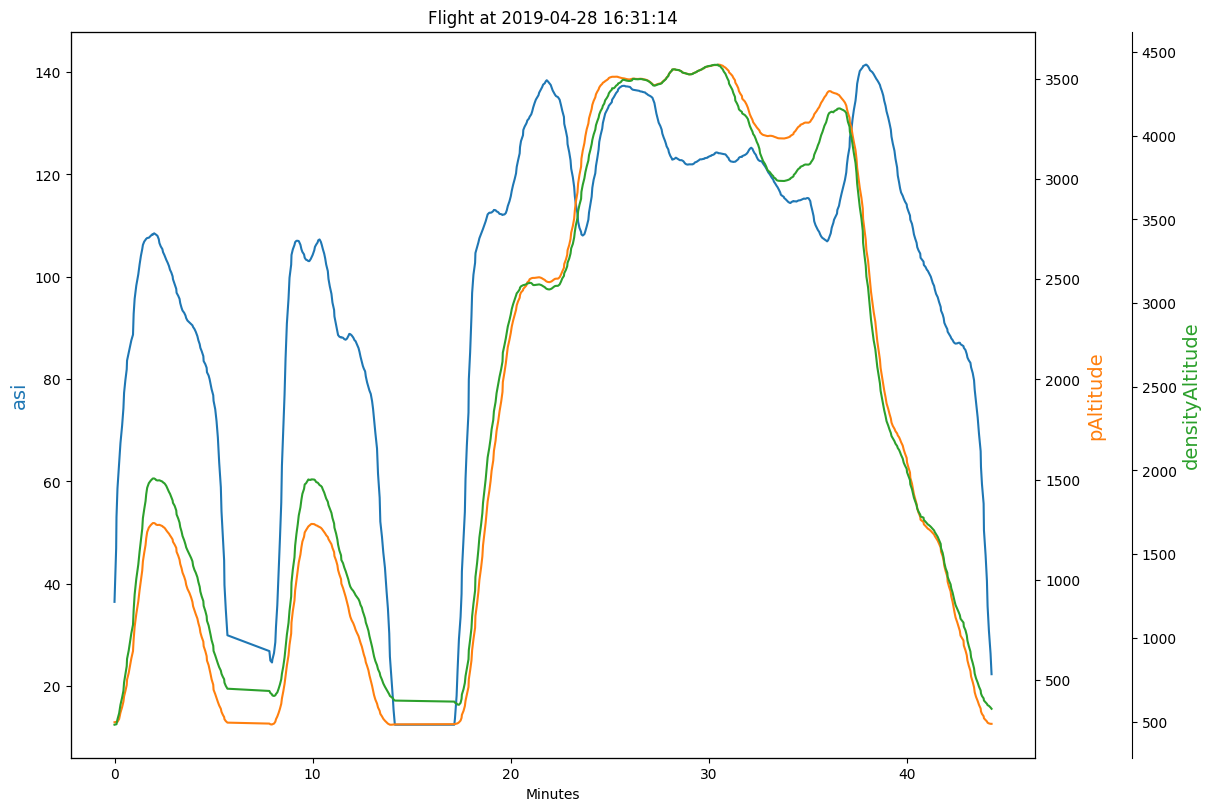

In [6]:
p.plot2(['asi', 'pAltitude', 'densityAltitude']).show()

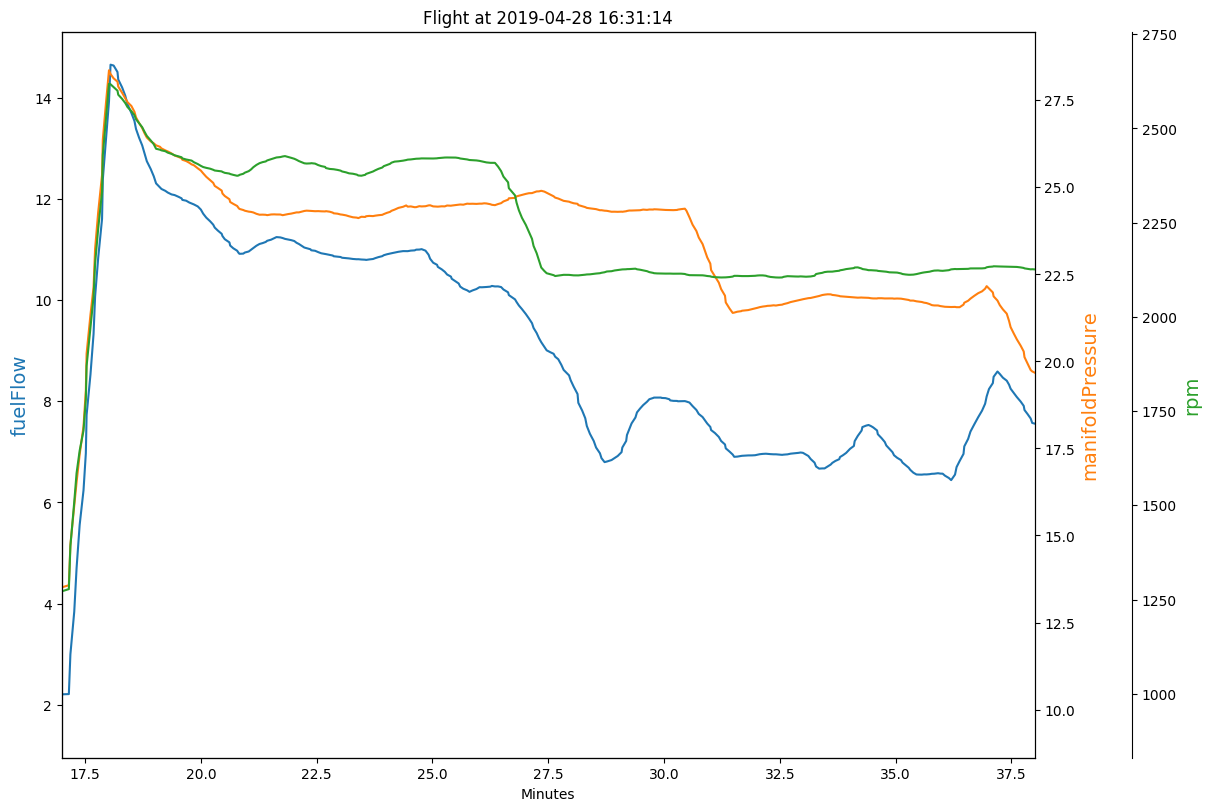

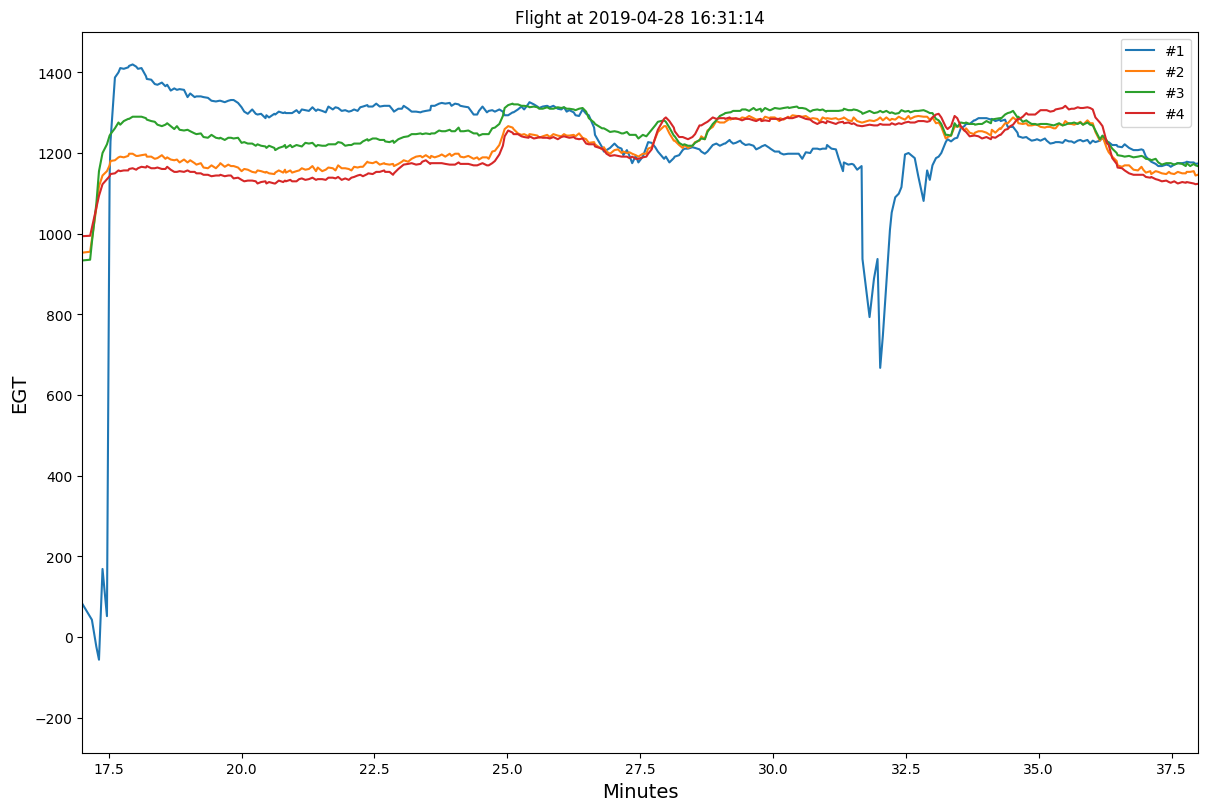

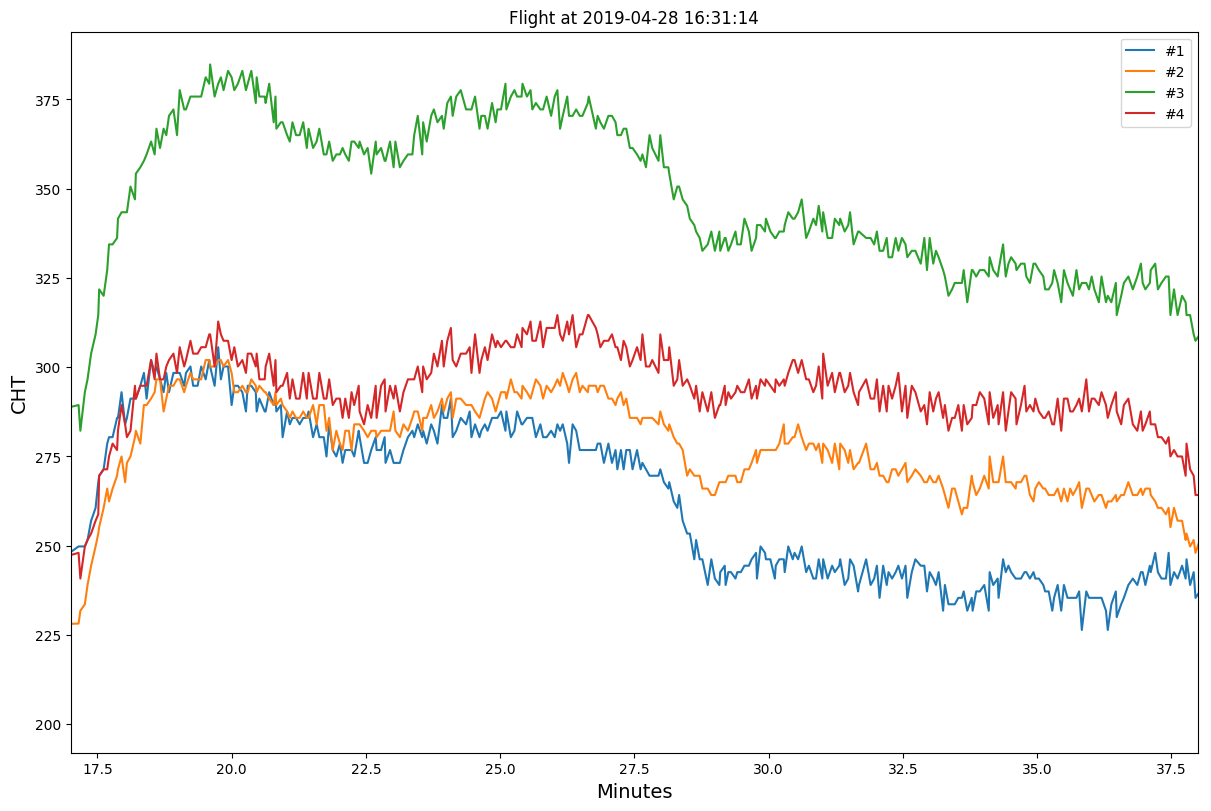

In [7]:
p.plot2(['fuelFlow', 'manifoldPressure', 'rpm'], xlim=(17, 38)).show()
p.plot('egt', 'EGT', xlim=(17, 38)).show()
p.plot('cht', 'CHT', xlim=(17, 38)).show()

## Cruise Climb - 75% Power, Full Rich Mixture

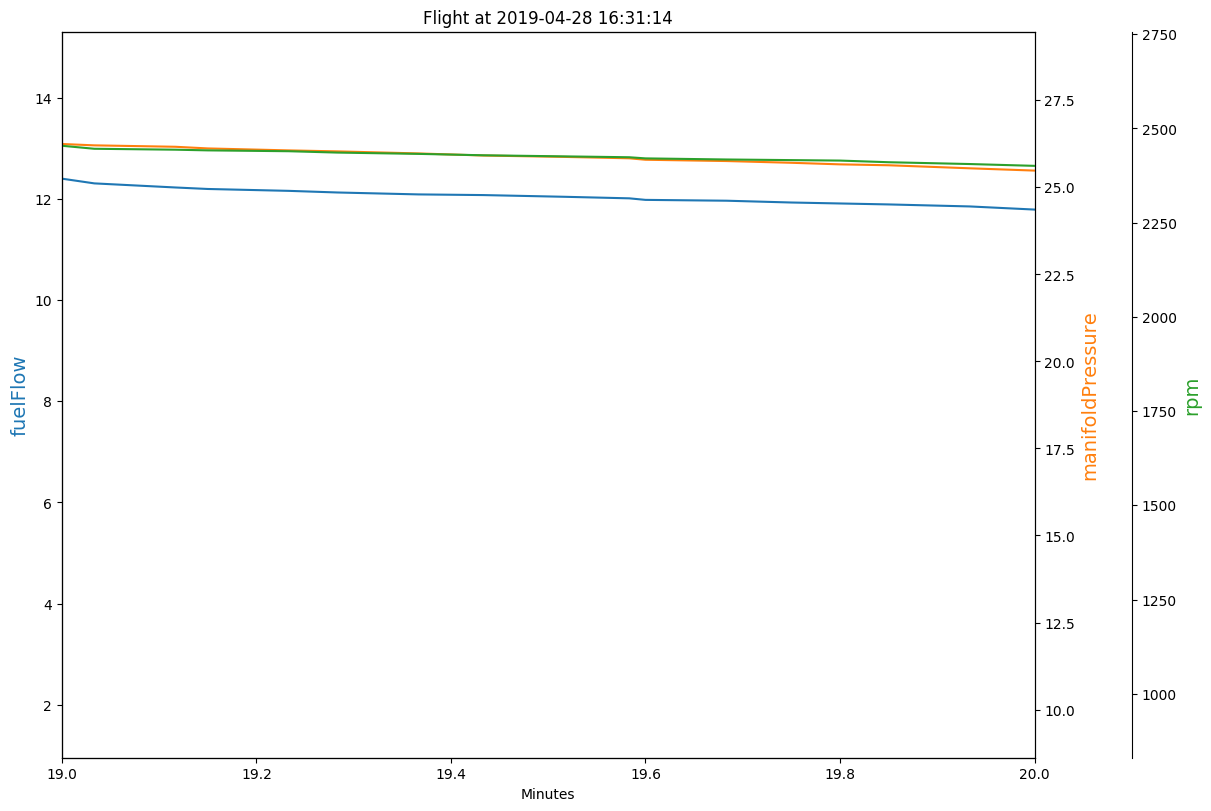

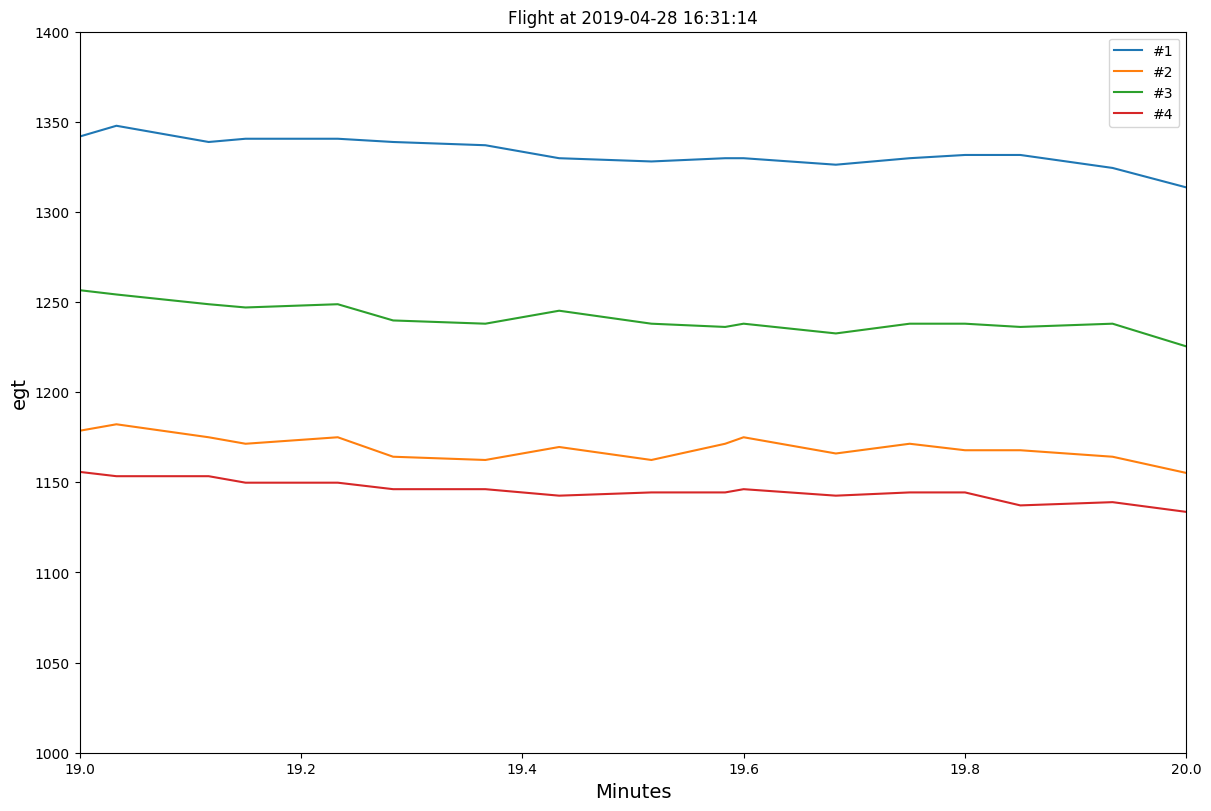

In [8]:
p.plot2(['fuelFlow', 'manifoldPressure', 'rpm'], xlim=(19, 20)).show()
p.plot('egt', xlim=(19, 20), ylim=(1000, 1400)).show()

## 75% Power

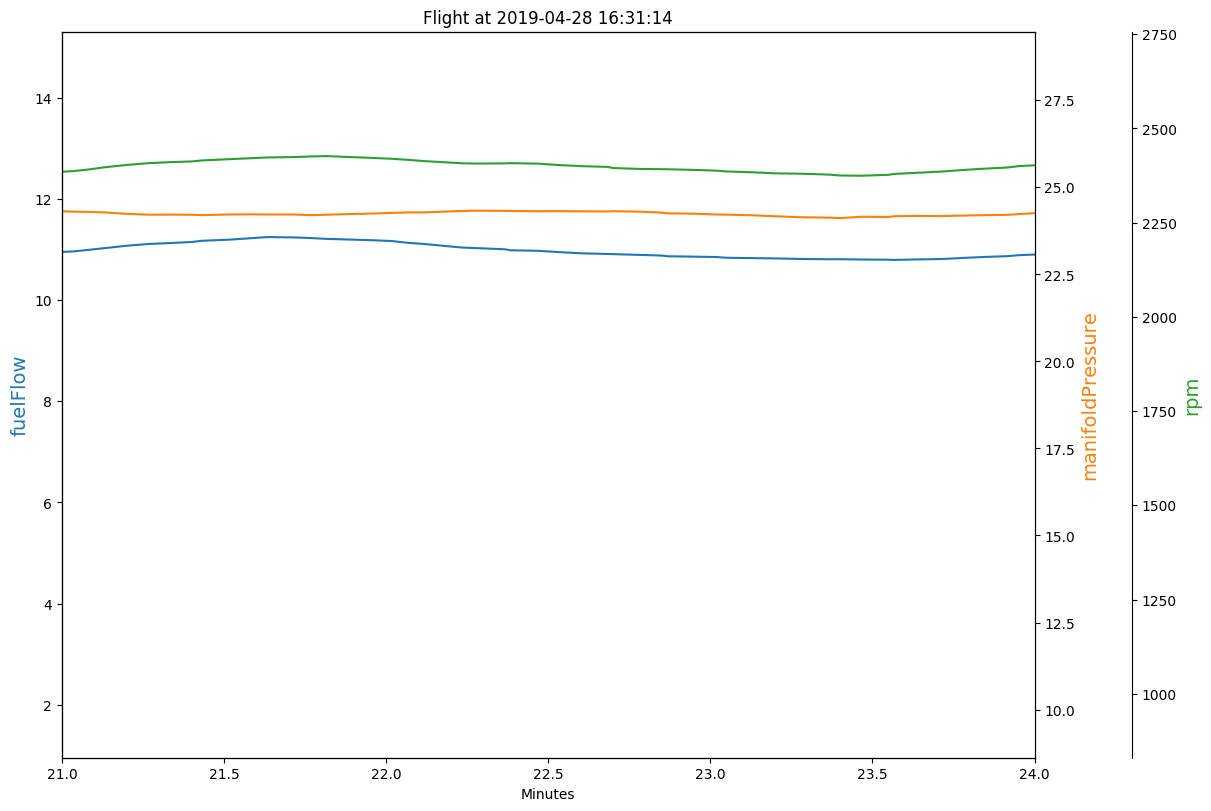

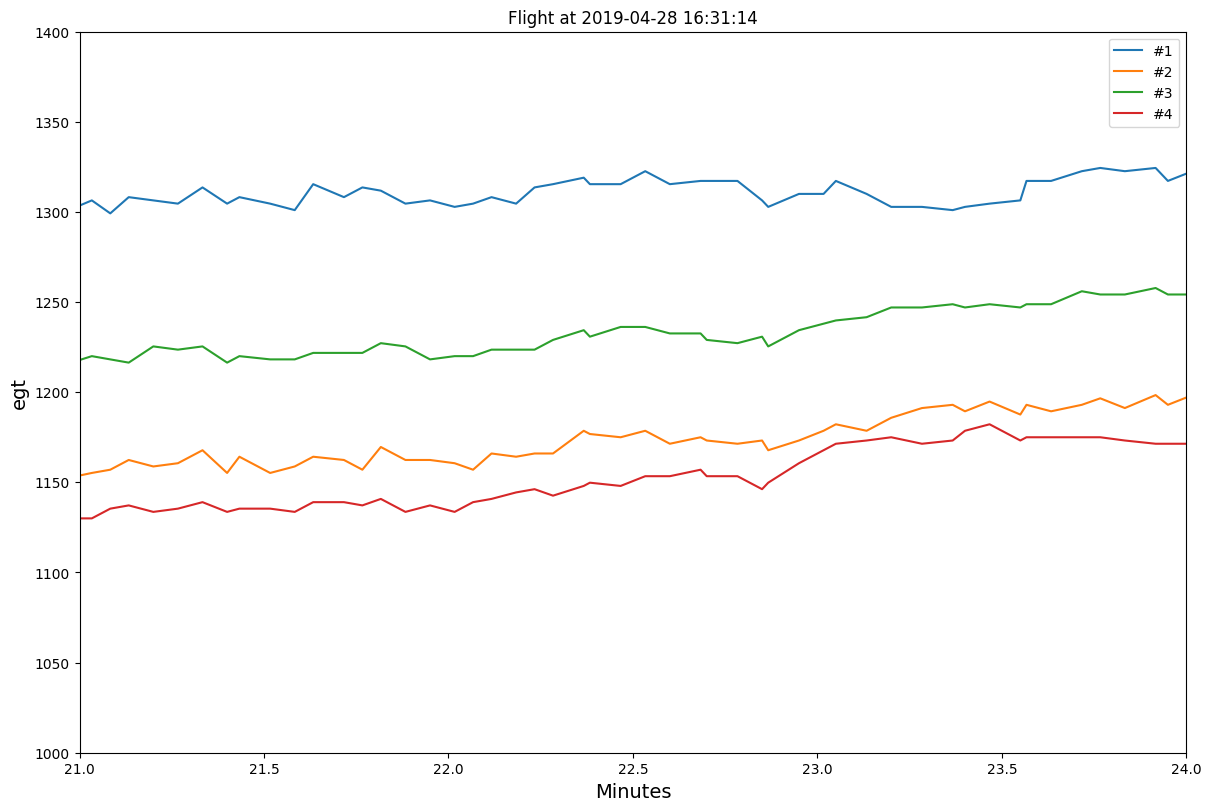

In [9]:
# 75% power
p.plot2(['fuelFlow', 'manifoldPressure', 'rpm'], xlim=(21, 24)).show()
p.plot('egt', xlim=(21, 24), ylim=(1000, 1400)).show()

## 65% Power

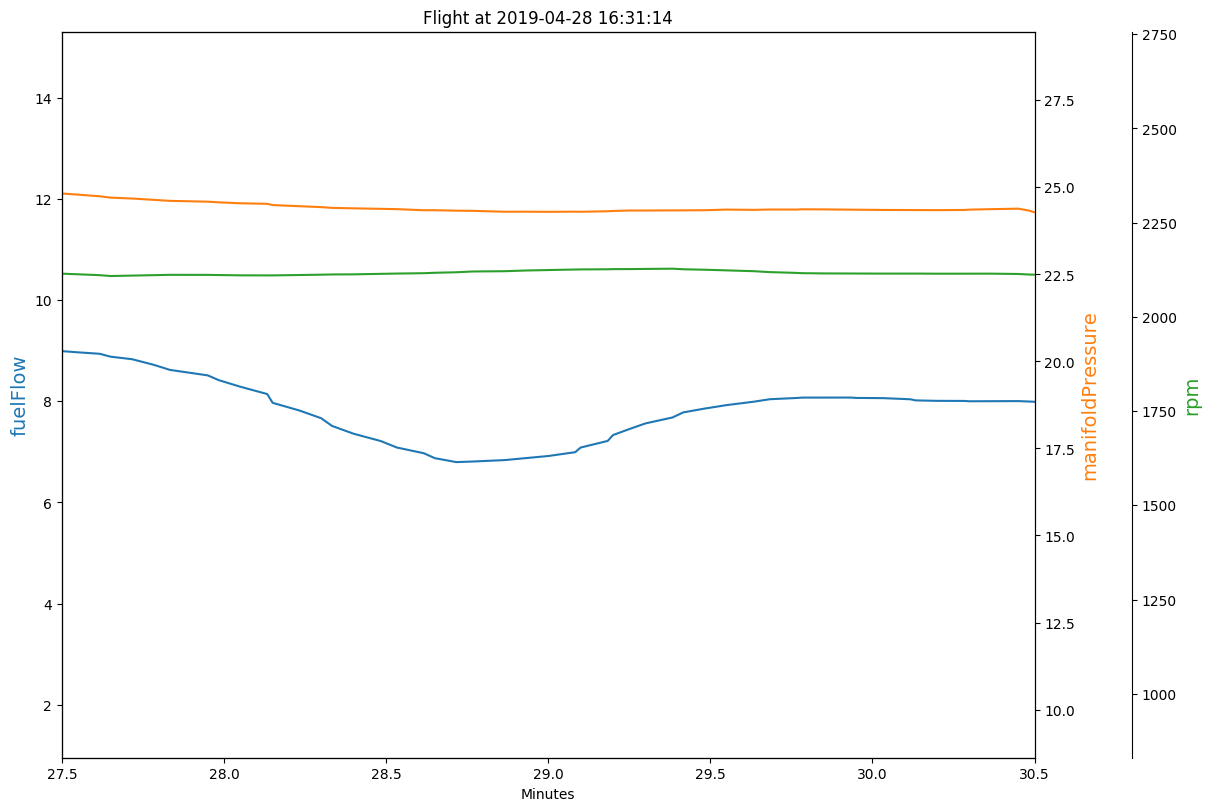

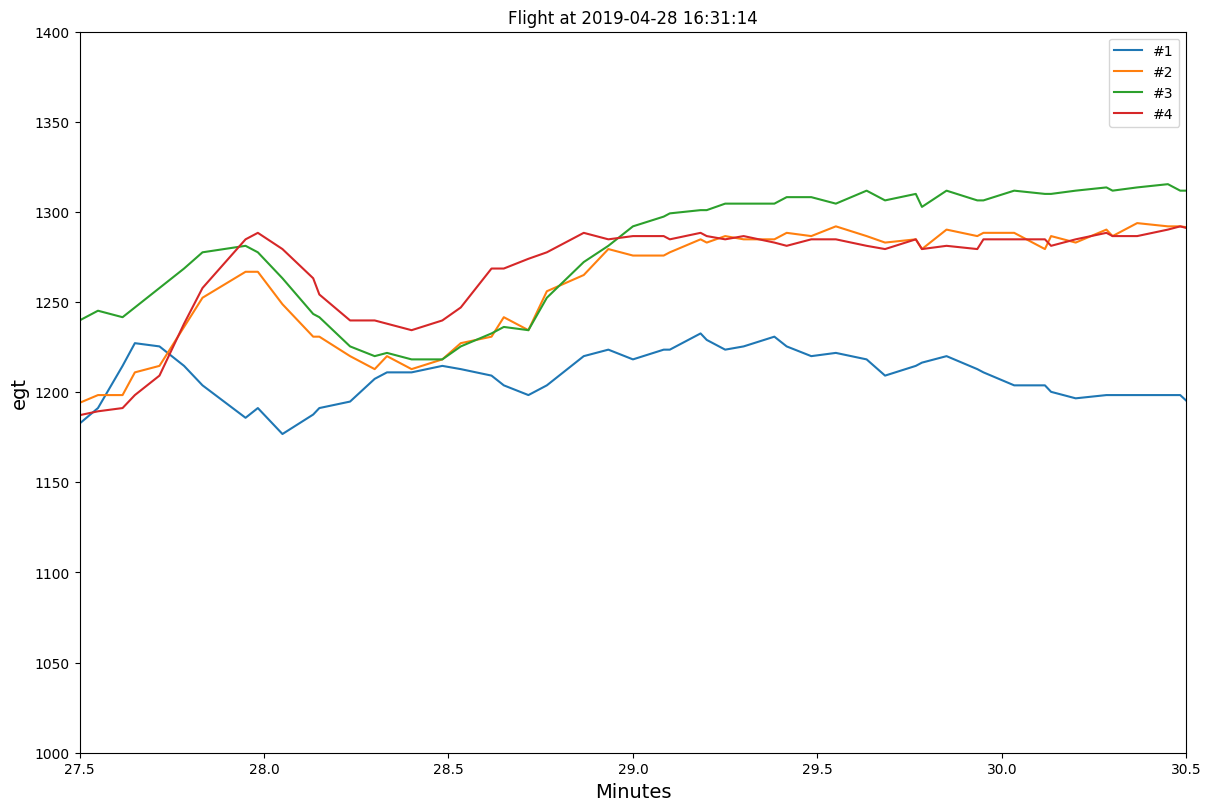

In [10]:
# 65% power
p.plot2(['fuelFlow', 'manifoldPressure', 'rpm'], xlim=(27.5, 30.5)).show()
p.plot('egt', xlim=(27.5, 30.5), ylim=(1000, 1400)).show()

## 55% Power

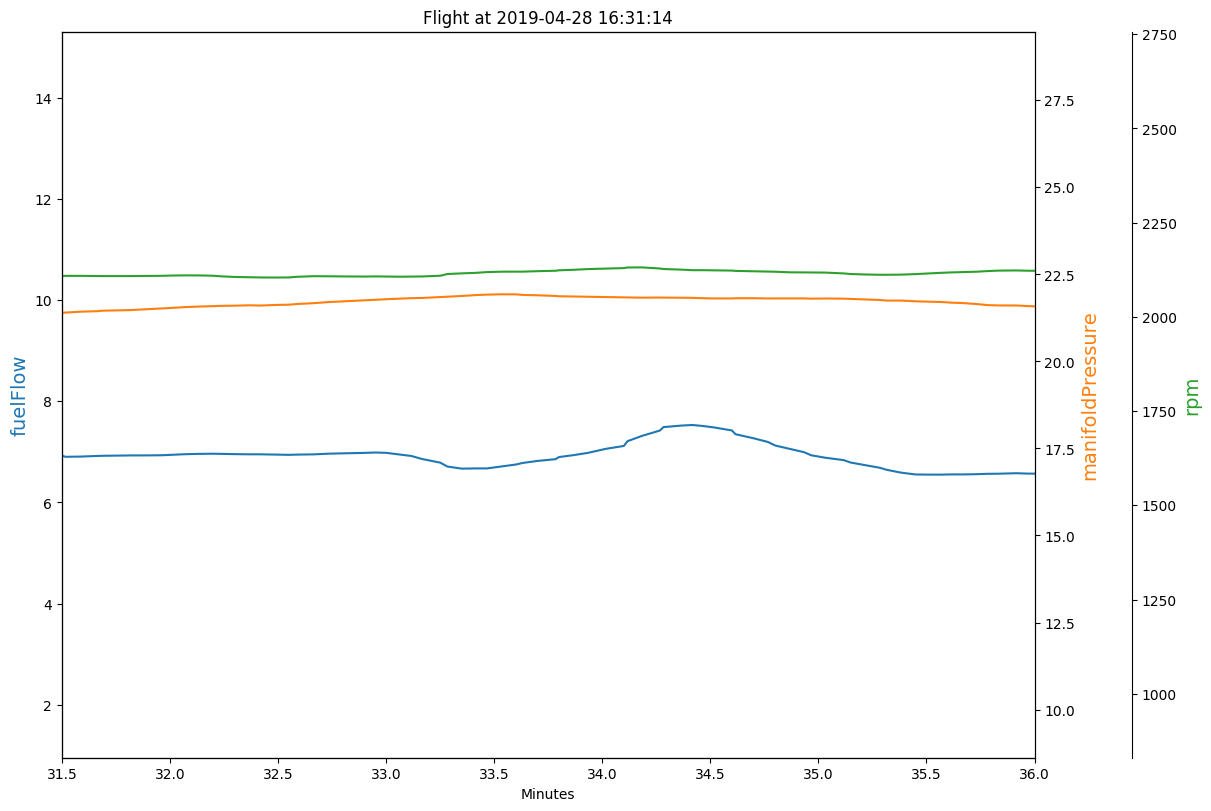

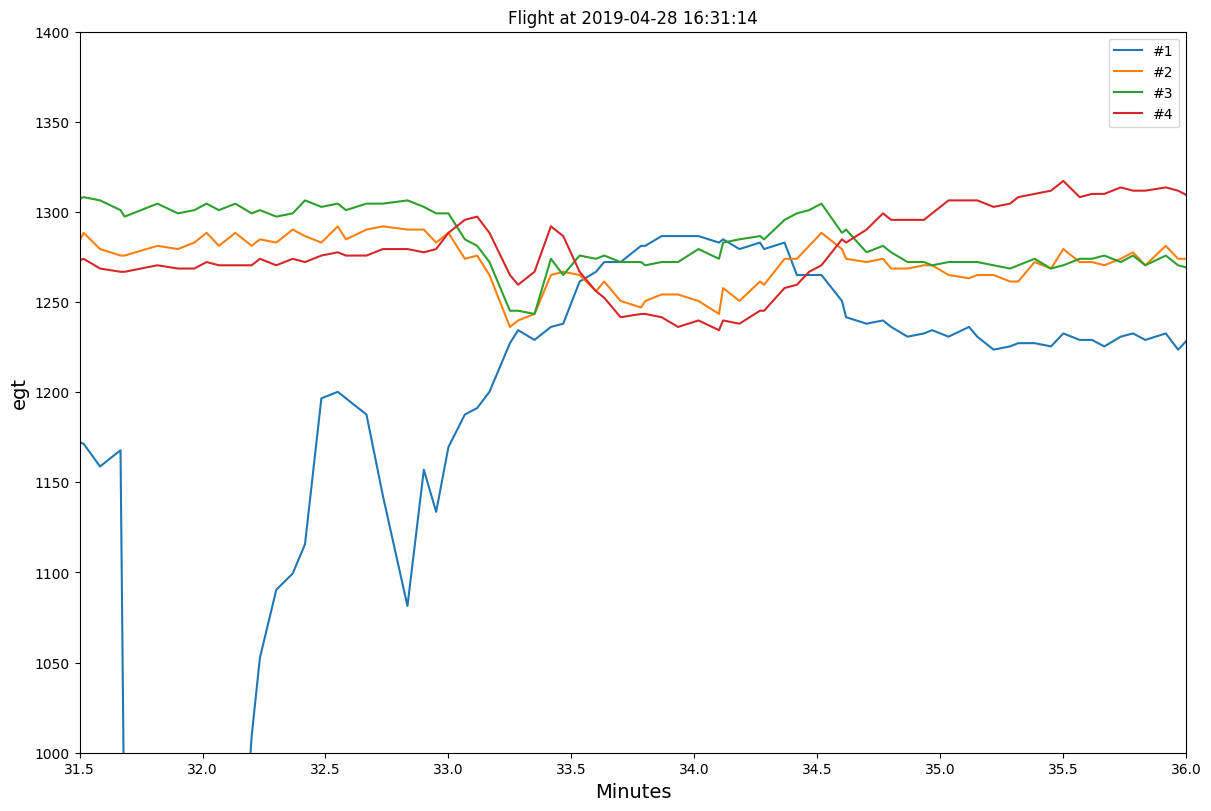

In [11]:
# 55% power
p.plot2(['fuelFlow', 'manifoldPressure', 'rpm'], xlim=(31.5, 36)).show()
p.plot('egt', xlim=(31.5, 36), ylim=(1000, 1400)).show()